## Portfolio Optimization

In this project, portfolio optimization on 9 selected stocks is conducted applying a Monte-Carlo-Simulation. The risk characteristics analyzed are standard deviation, Value at Risk, and Conditional Value at Risk.

The script is divided in several parts:
1. Import Libraries
2. Get and Prepare Relevant Stock Data (2010-2018)
3. Transform Dataframe
4. Plot Stock Development Over Time
5. Monte-Carlo-Simulation
6. Plot Efficient Frontiers
7. Analysis of Portfolios
8. Simulate Portfolios on Test Period (2019-2020)
9. Simulate with $1,000,000 Beginning Investment and Compare with Risk Free Rate

##### 1. Import Libraries

In [1]:
# import relevant libraries

# for data collection
from datetime import datetime, timedelta
import yfinance as yf

# for simulation 
import random

# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# timer for for-loops
from tqdm import tqdm

##### 2. Get and Prepare Relevant Stock Data (2010-2019)

The relevant tickers for our 9 selected stocks (spread across markets and industries) are the following:

1. PetroChina Company Limited (0857.HK)
2. China Mobile Limited (0941.HK)
3. Tencent Holdings Limited (0700.HK)
4. General Electric Company (GE)
5. Apple Inc. (AAPL)
6. Walmart Inc. (WMT)
7. LVMH Moët Hennessy - Louis Vuitton, Société Européenne (MC.PA)
8. ASML Holding N.V. (ASML)
9. Siemens Aktiengesellschaft (SIE.DE)

In [2]:
# define tickers and time span
tickers = ['0857.HK', '0941.HK', '0700.HK', 'GE', 'AAPL', 'WMT', 'MC.PA', 'ASML', 'SIE.DE']
start_date = datetime(2010, 1, 1)
end_date = datetime(2018, 12, 31)

In [3]:
# create dataframe with all data
stocks = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    # adjusted closing price because it accounts for dividends, stock splits, etc.
    stocks[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# check dataframe
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2206 entries, 2010-01-04 to 2018-12-28
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0857.HK  2206 non-null   float64
 1   0941.HK  2206 non-null   float64
 2   0700.HK  2206 non-null   float64
 3   GE       2151 non-null   float64
 4   AAPL     2151 non-null   float64
 5   WMT      2151 non-null   float64
 6   MC.PA    2201 non-null   float64
 7   ASML     2151 non-null   float64
 8   SIE.DE   2188 non-null   float64
dtypes: float64(9)
memory usage: 172.3 KB


In [5]:
# check dimensions
stocks.shape

(2206, 9)

In [6]:
# check first entries
stocks.head()

,0857.HK,0941.HK,0700.HK,GE,AAPL,WMT,MC.PA,ASML,SIE.DE
Date,,,,,,,,,
2010-01-04,5.111073,35.461395,32.224819,68.035362,6.478998,39.871311,60.207409,24.009943,39.892437
2010-01-05,5.413667,35.755482,32.953701,68.387611,6.490199,39.474297,59.924351,24.196985,39.916805
2010-01-06,5.523702,35.976044,33.030434,68.035362,6.386964,39.386082,60.505768,24.418657,40.063046
2010-01-07,5.501694,35.902515,31.764458,71.558212,6.375158,39.408127,61.194283,23.739782,40.538315
2010-01-08,5.545707,36.490681,32.205635,73.099464,6.417540,39.209618,62.020531,23.171743,40.794231


In [7]:
# change column names to make it easier to understand
stocks.columns = \
['PetroChina Company Limited', \
 'China Mobile Limited', \
 'Tencent Holdings Limited', \
 'General Electric Company', \
 'Apple Inc.', \
 'Walmart Inc.', \
 'LVMH Moët Hennessy (SE)', \
 'ASML Holding N.V.', \
 'Siemens Aktiengesellschaft']

In [8]:
# check how many trading days there are per year
entries_per_year = stocks.resample('Y').size()
print(entries_per_year, '\n')
print('The mean amount of trading days is: ', np.mean(entries_per_year))

Date
2010-12-31    236
2011-12-31    246
2012-12-31    246
2013-12-31    245
2014-12-31    247
2015-12-31    247
2016-12-31    247
2017-12-31    247
2018-12-31    245
Freq: A-DEC, dtype: int64 

The mean amount of trading days is:  245.11111111111111


For further processing 252 trading days per year are assumed.

In [9]:
# annualizing factor
days_per_year = 252

In [10]:
# save dataframe to csv
stocks.to_csv('stocks_data.csv')

In [11]:
# load dataframe
# stocks = pd.read_csv('stocks_data.csv', index_col=0)

##### 3. Transform Dataframe

To make a comparison possible the stocks are transformed to percentage returns.

In [12]:
# calculate log returns (advantage: additivity of logs)
log_returns = np.log(stocks/stocks.shift(1)).dropna() # drop first row (=NA)

In [13]:
# save dataframe to csv
log_returns.to_csv('log_returns_data.csv')

In [14]:
# load dataframe
# log_returns = pd.read_csv('log_returns_data.csv', index_col=0)

In [15]:
# check the transformed dataframe
log_returns.head()

,PetroChina Company Limited,China Mobile Limited,Tencent Holdings Limited,General Electric Company,Apple Inc.,Walmart Inc.,LVMH Moët Hennessy (SE),ASML Holding N.V.,Siemens Aktiengesellschaft
Date,,,,,,,,,
2010-01-05,0.057517,0.008259,0.022367,0.005164,0.001727,-0.010007,-0.004712,0.007760,0.000611
2010-01-06,0.020122,0.006150,0.002326,-0.005164,-0.016034,-0.002237,0.009656,0.009119,0.003657
2010-01-07,-0.003992,-0.002046,-0.039081,0.050484,-0.001850,0.000560,0.011315,-0.028195,0.011793
2010-01-08,0.007968,0.016250,0.013793,0.021310,0.006626,-0.005050,0.013412,-0.024219,0.006293
2010-01-11,0.009872,0.005359,0.017125,0.009592,-0.008861,0.016366,0.007741,-0.021454,0.002536


##### 4. Plot Stock Development Over Time

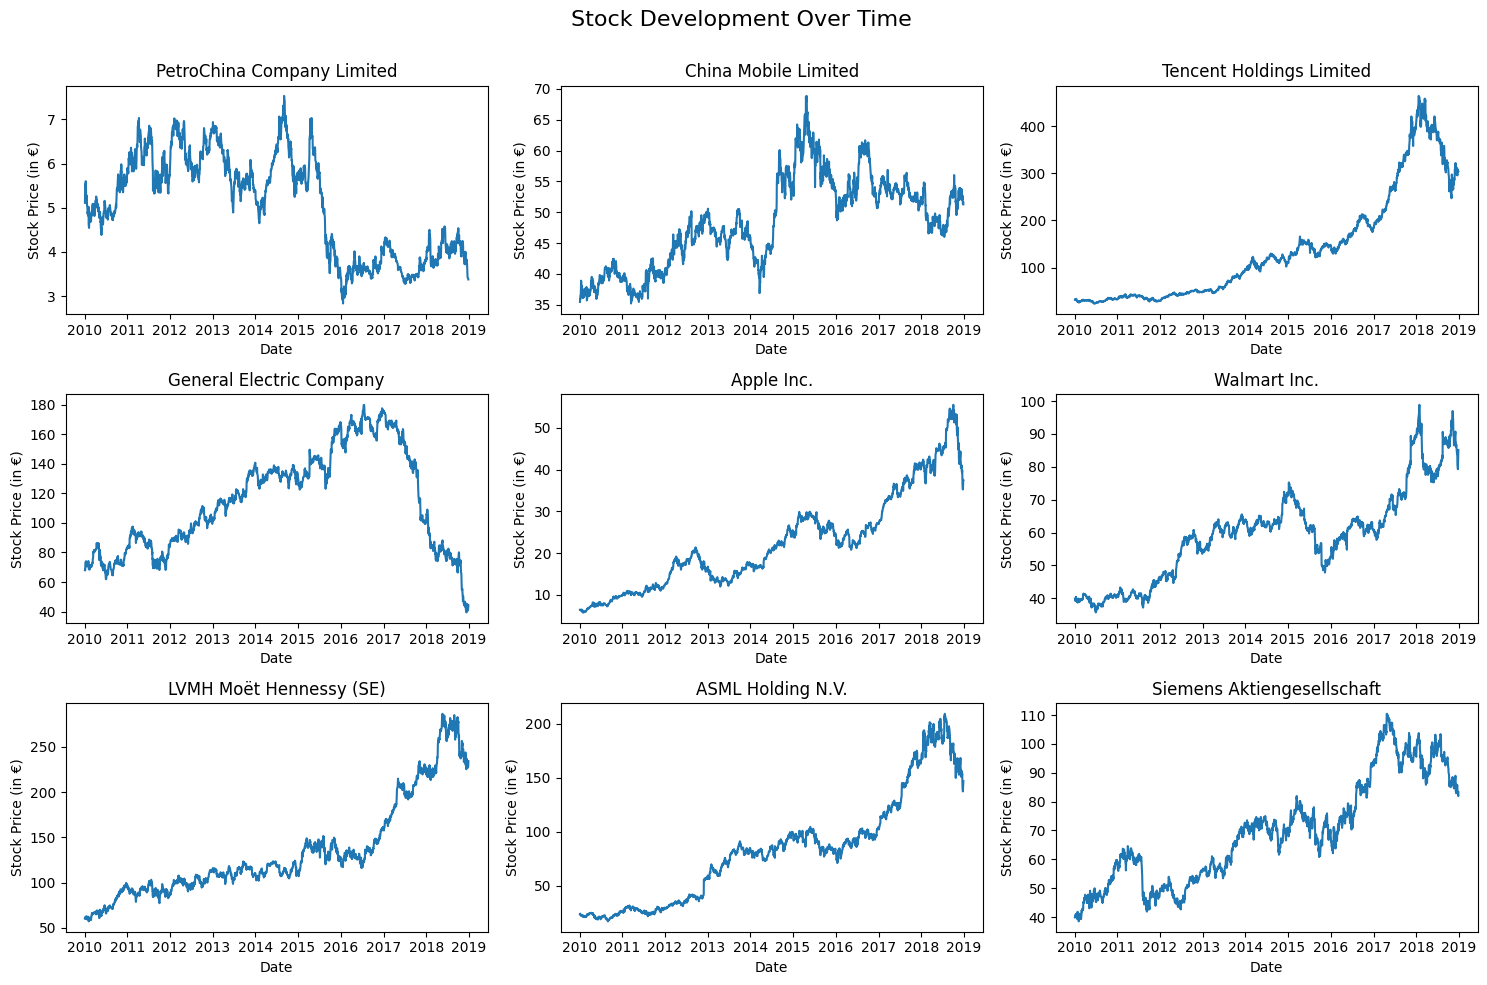

In [16]:
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# loop through stocks and plot each in a separate subplot
for i in range(3):
    for j in range(3):
        stock_name = stocks.columns[i*3+j]
        sns.lineplot(data=stocks[stock_name], ax=axes[i, j])
        x_scaler = int(stocks.iloc[:,[i*3+j]].max())*1.1
        axes[i,j].set_title(stock_name)
        axes[i,j].set_xlabel('Date')
        axes[i,j].set_ylabel('Stock Price (in €)')

# title for the entire set of subplots
fig.suptitle('Stock Development Over Time \n', fontsize=16)

# adjust subplot layout
plt.tight_layout()

# save plot
plt.savefig('Stocks_Development.png')

# show the plot
plt.show()

##### 5. Monte Carlo Simulation

In [17]:
# set all input variables

# set seed for reproducibility
np.random.seed(1)

# number of stocks
num_stocks = stocks.shape[1]

# number of simulations
num_sim = 100000

# confidence level for VaR
confidence_level = 0.95

In [18]:
# calculate the covariane matrix
cov_matrix = log_returns.cov()

In [19]:
# plot the covariance matrix
cov_matrix

,PetroChina Company Limited,China Mobile Limited,Tencent Holdings Limited,General Electric Company,Apple Inc.,Walmart Inc.,LVMH Moët Hennessy (SE),ASML Holding N.V.,Siemens Aktiengesellschaft
PetroChina Company Limited,0.000311,0.000111,0.000154,0.000042,0.000031,0.000007,0.000076,0.000033,0.000061
China Mobile Limited,0.000111,0.000169,0.000093,0.000016,0.000014,0.000005,0.000044,0.000017,0.000033
Tencent Holdings Limited,0.000154,0.000093,0.000408,0.000030,0.000034,0.000004,0.000083,0.000055,0.000057
General Electric Company,0.000042,0.000016,0.000030,0.000248,0.000082,0.000048,0.000094,0.000116,0.000094
Apple Inc.,0.000031,0.000014,0.000034,0.000082,0.000277,0.000040,0.000079,0.000128,0.000066
Walmart Inc.,0.000007,0.000005,0.000004,0.000048,0.000040,0.000124,0.000038,0.000053,0.000034
LVMH Moët Hennessy (SE),0.000076,0.000044,0.000083,0.000094,0.000079,0.000038,0.000283,0.000127,0.000157
ASML Holding N.V.,0.000033,0.000017,0.000055,0.000116,0.000128,0.000053,0.000127,0.000420,0.000108
Siemens Aktiengesellschaft,0.000061,0.000033,0.000057,0.000094,0.000066,0.000034,0.000157,0.000108,0.000211


<AxesSubplot:>

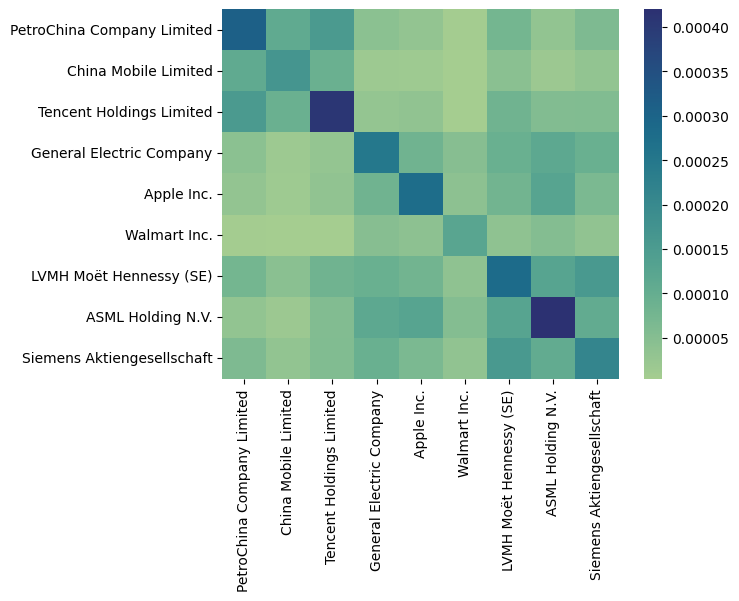

In [20]:
# for better understanding plot as heatmap
sns.heatmap(cov_matrix, cmap="crest")

In [21]:
# save all risk measures in these numpy arrays
weights_all = np.zeros((num_sim,len(stocks.columns)))
expected_return_daily = np.zeros(num_sim)
sd_daily = np.zeros(num_sim)
var_daily = np.zeros(num_sim)
cvar_daily = np.zeros(num_sim)

In [22]:
# function to generate weights
# with long and short selling
# generate for each iteration as many random values as stocks
# sum has to be 1
def generate_weights():
    while True:
        weights = [random.uniform(-1, 1) for i in range(num_stocks-1)]
        weights.append(1 - sum(weights))
        if -1 <= weights[-1] <= 1:
            return weights

In [23]:
for simulations in tqdm(range(num_sim)):
    '''
    simulate num_sim times different, random weight portfolios and calculate the respective risk metrics
    '''

    # weights
    # with long and short selling
    # generate for each iteration as many random values as stocks
    weights = generate_weights()

    # create a temporary df to apply weights on the daily log returns
    log_returns_weights = log_returns.copy()
    # apply weights on individual daily returns
    for i in range(log_returns.shape[1]):
        log_returns_weights.iloc[:,i] *= weights[i]
    # combine to only one numpy array
    log_returns_aggregated = log_returns_weights.sum(axis=1)

    # calculate all risk measures for all simulated portfolios and add them to their respective numpy array
    # all measures here are in log-scale
    # daily risk measures

    # weights
    weights_all[simulations,:] = weights
    # expected return daily
    expected_return_daily[simulations] = np.mean(log_returns_aggregated)
    # standard deviation daily
    sd_daily[simulations] = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights))) 
    # Value at Risk (VaR) daily
    var_daily[simulations] = -np.percentile(log_returns_aggregated, 1-confidence_level)
    # Conditional Value at Risk (CVaR) daily
    # find losses exceeding VaR
    losses = [r for r in log_returns_aggregated if r < -var_daily[simulations]]
    cvar_daily[simulations] = -np.mean(losses)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [08:39<00:00, 192.60it/s]


##### 6. Plot Efficient Frontier

###### 6.1. Plot Efficient Frontier (Expected Return (Daily) vs. Standard Deviation (Daily))

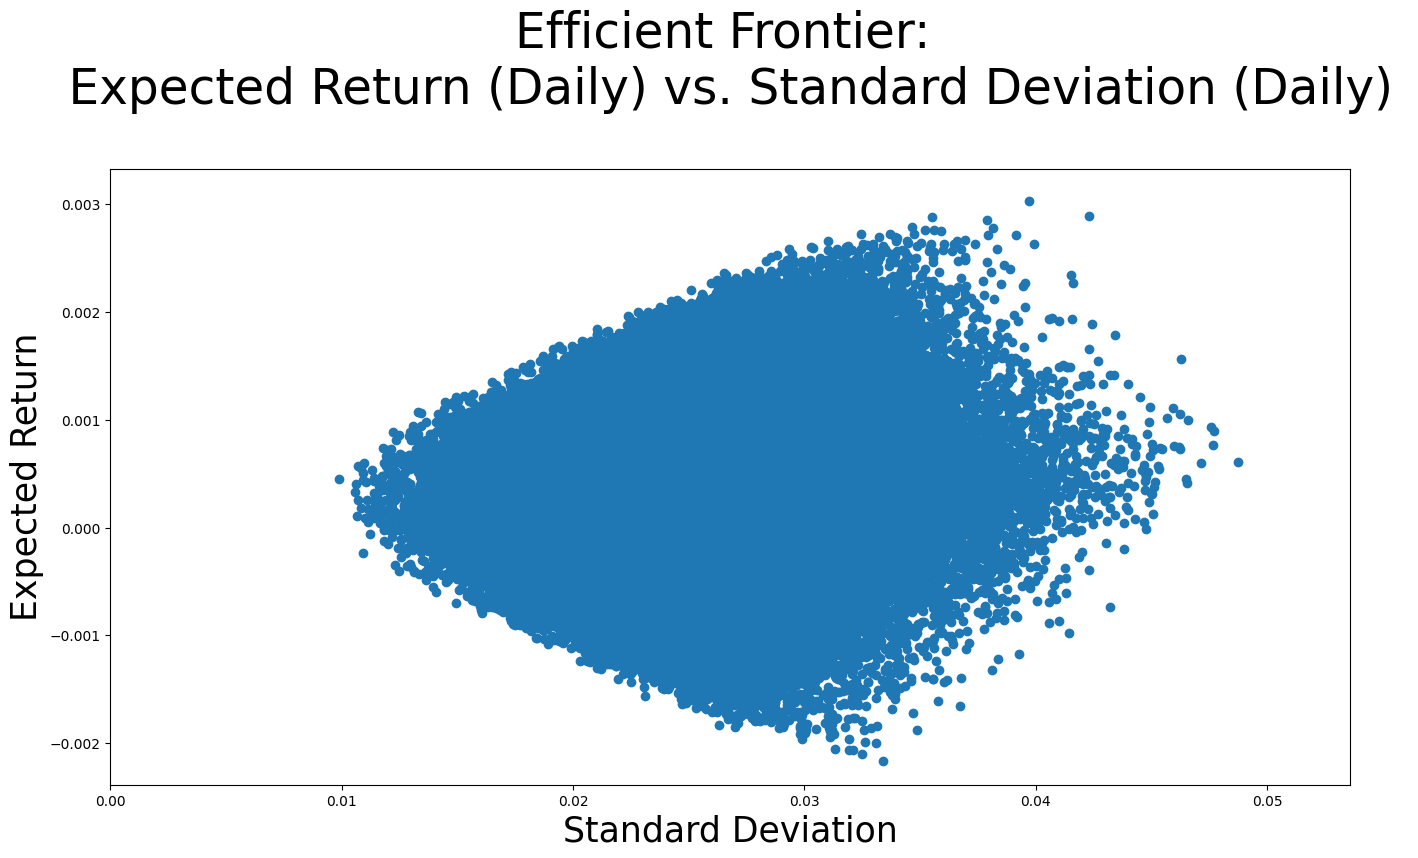

In [24]:
# plot efficient frontier (expected return (daily) vs. standard deviation (daily))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(sd_daily,expected_return_daily)

# set axes ranges
plt.ylim([min(expected_return_daily)*1.1,max(expected_return_daily)*1.1])
plt.xlim([0,max(sd_daily)*1.1])

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Daily) vs. Standard Deviation (Daily) \n', fontsize=35)
plt.xlabel('Standard Deviation', fontsize=25)
plt.ylabel('Expected Return', fontsize=25)

# plot
plt.show()

###### 6.1.1. Add Points to Focus On

In [25]:
# decide on points to focus on (on efficient frontier)

# most left point
index_low_sd = np.argmin(sd_daily)

# most right point, maximizing return
index_high_sd = np.argmax(expected_return_daily)

# point with return in between previous two points
# first calculate the return
middle_return = expected_return_daily[index_low_sd] + 0.5*(expected_return_daily[index_high_sd]-expected_return_daily[index_low_sd])
# calculate points that are taking into consideration (some tolerance added)
middle_return_all = np.where(np.abs(expected_return_daily - middle_return) <= 0.0001)
# calculate the index where sd is minimized
index_middle_sd = middle_return_all[0][np.argmin(sd_daily[middle_return_all])]

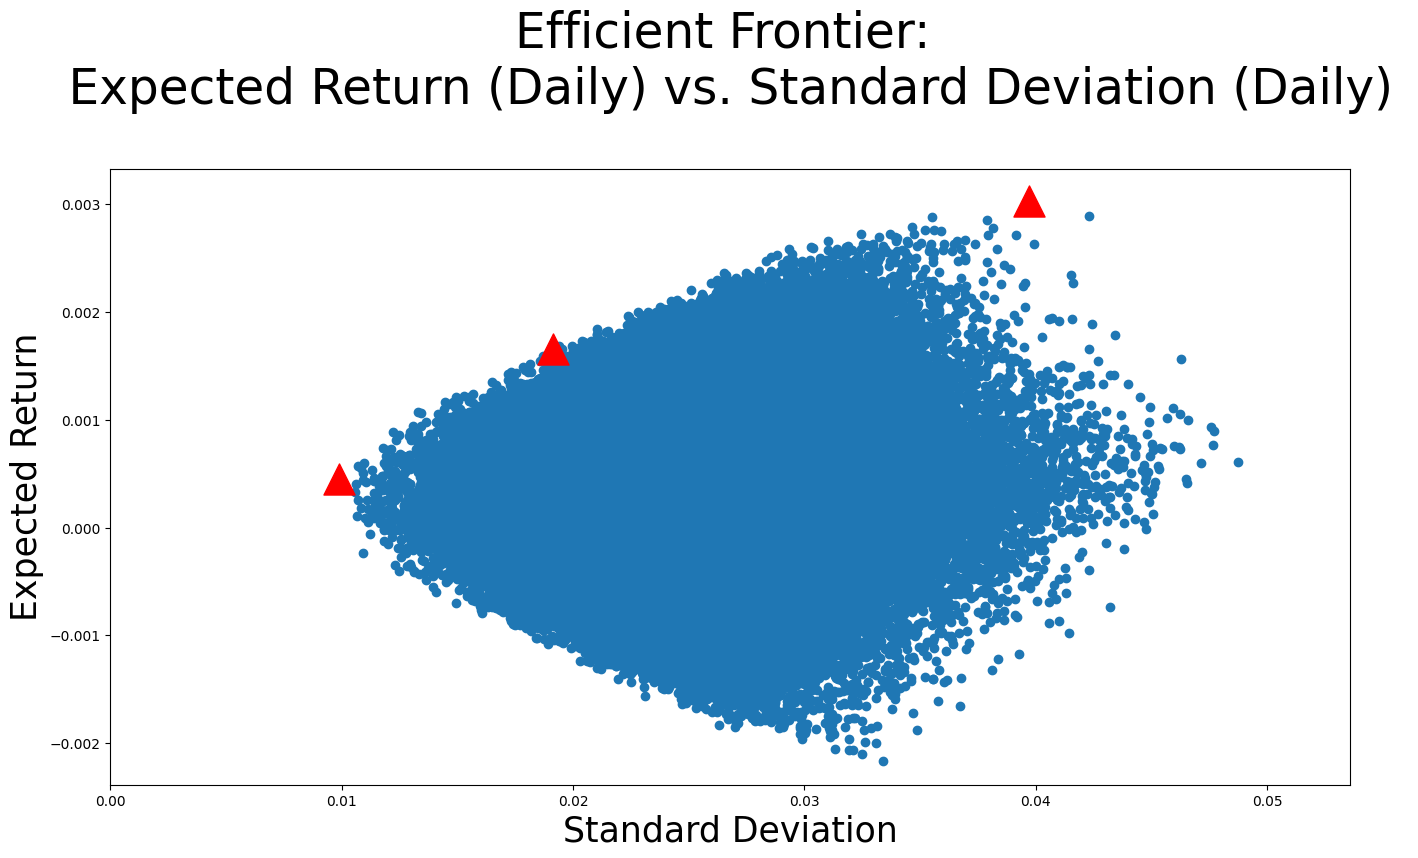

In [26]:
# plot efficient frontier (expected return (daily) vs. standard deviation (daily))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(sd_daily,expected_return_daily)

# set axes ranges
plt.ylim([min(expected_return_daily)*1.1,max(expected_return_daily)*1.1])
plt.xlim([0,max(sd_daily)*1.1])

# add points
plt.scatter(sd_daily[index_low_sd], expected_return_daily[index_low_sd], color='red', label='Low Risk', s=500, marker="^")
plt.scatter(sd_daily[index_middle_sd], expected_return_daily[index_middle_sd], color='red', label='Middle Risk', s=500, marker="^")
plt.scatter(sd_daily[index_high_sd], expected_return_daily[index_high_sd], color='red', label='High Risk', s=500, marker="^")

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Daily) vs. Standard Deviation (Daily) \n', fontsize=35)
plt.xlabel('Standard Deviation', fontsize=25)
plt.ylabel('Expected Return', fontsize=25)

# plot
plt.show()

###### 6.2. Plot Efficient Frontier (Expected Return (Daily) vs. Value at Risk (Daily))

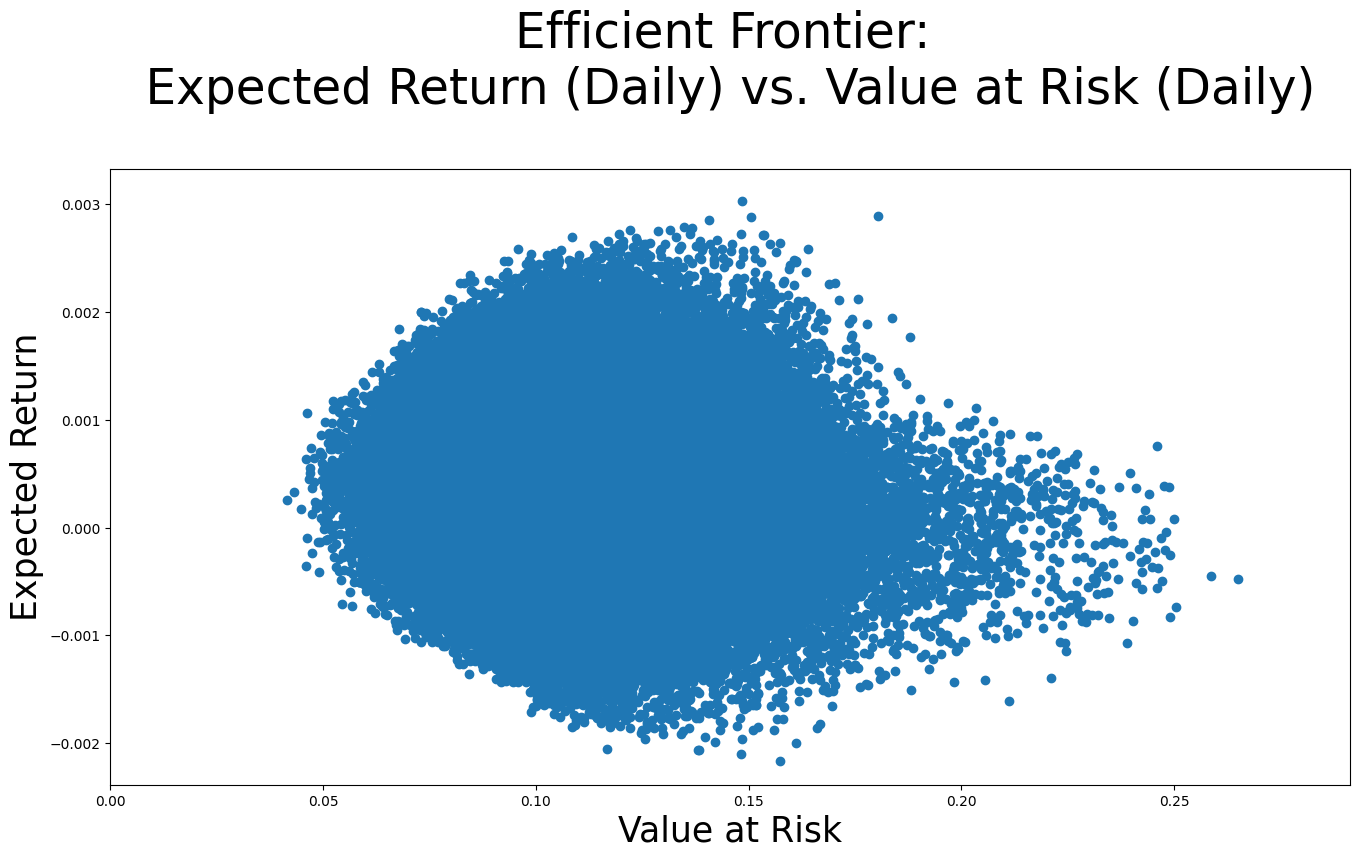

In [27]:
# plot efficient frontier (expected return (daily) vs. VaR (daily))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(var_daily,expected_return_daily)

# set axes ranges
plt.ylim([min(expected_return_daily)*1.1,max(expected_return_daily)*1.1])
# plt.xlim([min(var_daily)*1.1,0])
plt.xlim([0,max(var_daily)*1.1])

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Daily) vs. Value at Risk (Daily) \n', fontsize=35)
plt.xlabel('Value at Risk', fontsize=25)
plt.ylabel('Expected Return', fontsize=25)

# plot
plt.show()

###### 6.2.1. Add Points to Focus On

In [28]:
# decide on points to focus on (on efficient frontier)

# most left point (minimize VaR)
index_low_var = np.argmin(var_daily)

# most right point, maximizing return
index_high_var = np.argmax(expected_return_daily)

# point with return in between previous two points
# first calculate the return
middle_return = expected_return_daily[index_low_var] + 0.5*(expected_return_daily[index_high_var]-expected_return_daily[index_low_var])
# calculate points that are taking into consideration (some tolerance added)
middle_return_all = np.where(np.abs(expected_return_daily - middle_return) <= 0.0001)
# calculate the index where VaR is minimized (lowest loss)
index_middle_var = middle_return_all[0][np.argmin(var_daily [middle_return_all])]

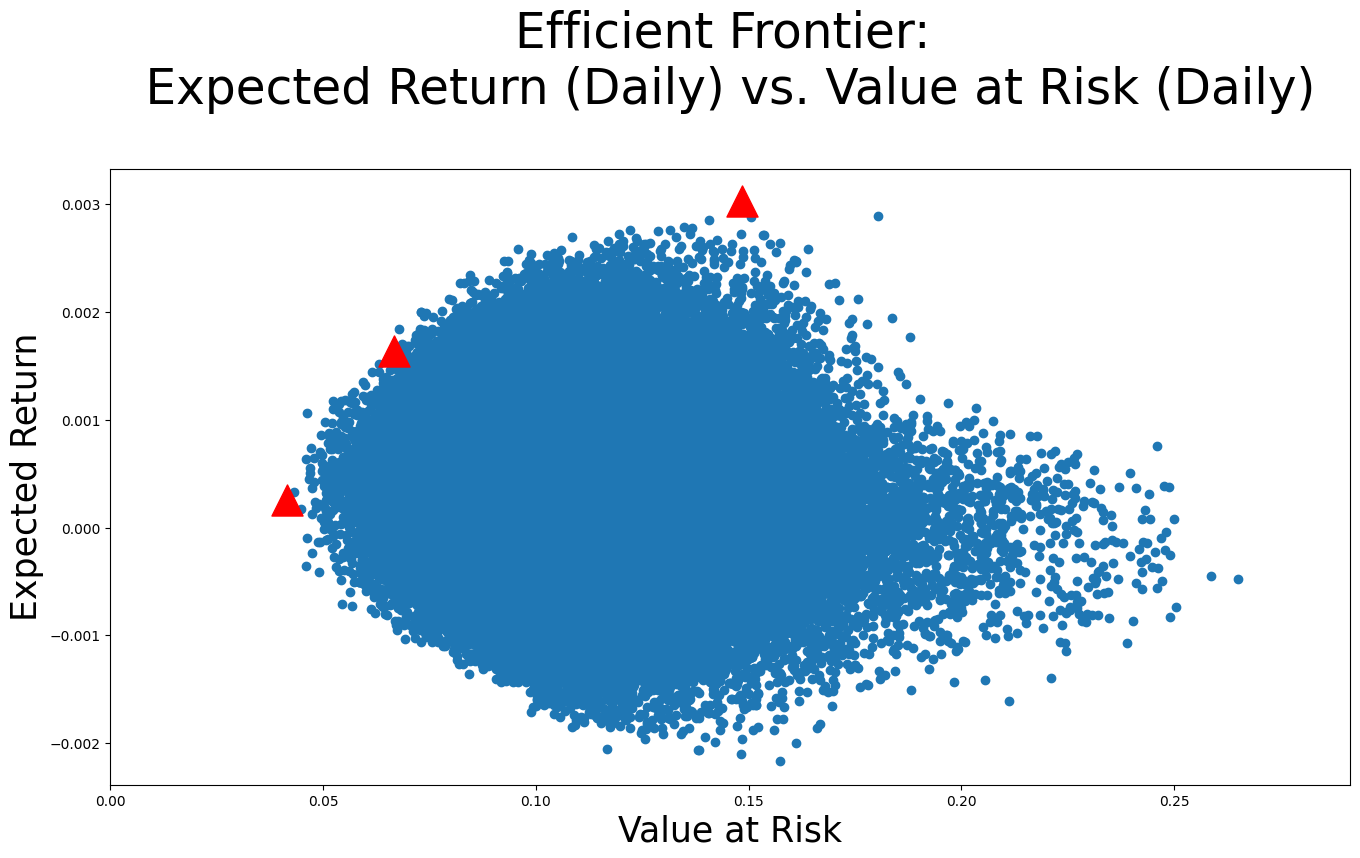

In [29]:
# plot efficient frontier (expected return (daily) vs. VaR (daily))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(var_daily,expected_return_daily)

# set axes ranges
plt.ylim([min(expected_return_daily)*1.1,max(expected_return_daily)*1.1])
# plt.xlim([min(var_daily)*1.1,0])
plt.xlim([0,max(var_daily)*1.1])

# add points
plt.scatter(var_daily[index_low_var], expected_return_daily[index_low_var], color='red', label='Low Risk', s=500, marker="^")
plt.scatter(var_daily[index_middle_var], expected_return_daily[index_middle_var], color='red', label='Middle Risk', s=500, marker="^")
plt.scatter(var_daily[index_high_var], expected_return_daily[index_high_var], color='red', label='High Risk', s=500, marker="^")

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Daily) vs. Value at Risk (Daily) \n', fontsize=35)
plt.xlabel('Value at Risk', fontsize=25)
plt.ylabel('Expected Return', fontsize=25)

# plot
plt.show()

###### 6.3. Plot Efficient Frontier (Expected Return (Daily) vs. Conditional Value at Risk (Daily))

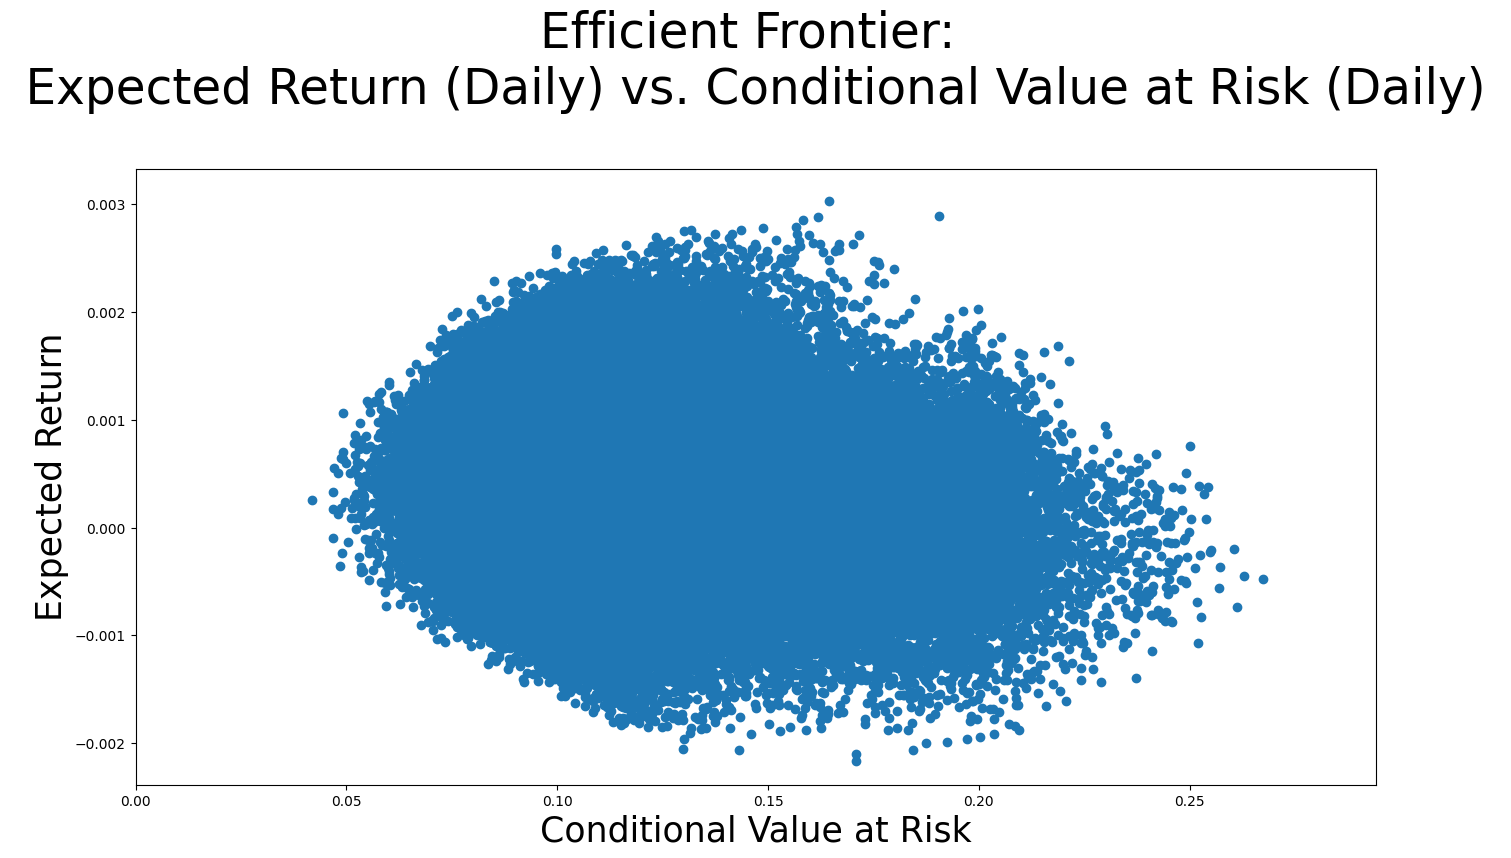

In [30]:
# plot efficient frontier (expected return (daily) vs. CVaR (daily))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(cvar_daily,expected_return_daily)

# set axes ranges
plt.ylim([min(expected_return_daily)*1.1,max(expected_return_daily)*1.1])
# plt.xlim([min(cvar_daily)*1.1,0])
plt.xlim([0,max(cvar_daily)*1.1])

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Daily) vs. Conditional Value at Risk (Daily) \n', fontsize=35)
plt.xlabel('Conditional Value at Risk', fontsize=25)
plt.ylabel('Expected Return', fontsize=25)

# plot
plt.show()

###### 6.3.1. Add Points to Focus On

In [31]:
# decide on points to focus on (on efficient frontier)

# most left point (minimize CVaR)
index_low_cvar = np.argmin(cvar_daily)

# most right point, maximizing return
index_high_cvar = np.argmax(expected_return_daily)

# point with return in between previous two points
# first calculate the return
middle_return = expected_return_daily[index_low_cvar] + 0.5*(expected_return_daily[index_high_cvar]-expected_return_daily[index_low_cvar])
# calculate points that are taking into consideration (some tolerance added)
middle_return_all = np.where(np.abs(expected_return_daily - middle_return) <= 0.0001)
# calculate the index where VaR is minimized (lowest loss)
index_middle_cvar = middle_return_all[0][np.argmin(cvar_daily[middle_return_all])]

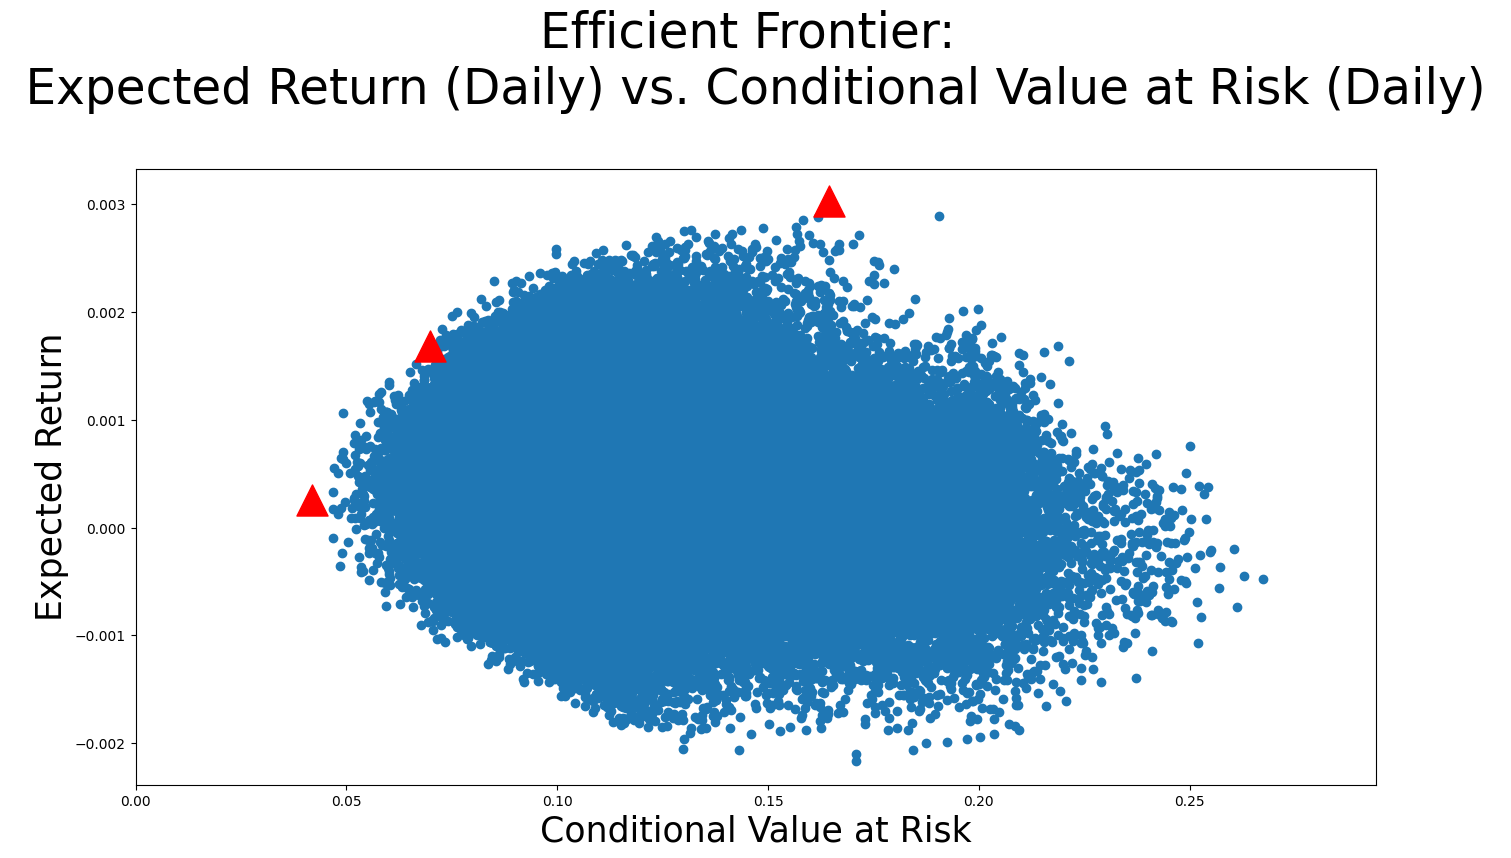

In [32]:
# plot efficient frontier (expected return (daily) vs. CVaR (daily))

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.scatter(cvar_daily,expected_return_daily)

# set axes ranges
plt.ylim([min(expected_return_daily)*1.1,max(expected_return_daily)*1.1])
# plt.xlim([min(cvar_daily)*1.1,0])
plt.xlim([0,max(cvar_daily)*1.1])

# add points
plt.scatter(cvar_daily[index_low_cvar], expected_return_daily[index_low_cvar], color='red', label='Low Risk', s=500, marker="^")
plt.scatter(cvar_daily[index_middle_cvar], expected_return_daily[index_middle_cvar], color='red', label='Middle Risk', s=500, marker="^")
plt.scatter(cvar_daily[index_high_cvar], expected_return_daily[index_high_cvar], color='red', label='High Risk', s=500, marker="^")

# title for plot and axes
plt.title('Efficient Frontier: \n Expected Return (Daily) vs. Conditional Value at Risk (Daily) \n', fontsize=35)
plt.xlabel('Conditional Value at Risk', fontsize=25)
plt.ylabel('Expected Return', fontsize=25)

# plot
plt.show()

##### 7. Analysis of Portfolios

Analyze the risk properties of all points identified

In [33]:
# based on standard deviation
print('\n Risk Properties of Low Point: \n', \
     'Weights: ', np.round(weights_all[index_low_sd],4), \
     '\n Expected Return: ', expected_return_daily[index_low_sd], \
     '\n Standard Deviation: ', sd_daily[index_low_sd], \
     '\n VaR: ', var_daily[index_low_sd], \
     '\n CVaR: ', cvar_daily[index_low_sd])

print('\n Risk Properties of Middle Point: \n', \
     'Weights: ', np.round(weights_all[index_middle_sd],4), \
     '\n Expected Return: ', expected_return_daily[index_middle_sd], \
     '\n Standard Deviation: ', sd_daily[index_middle_sd], \
     '\n VaR: ', var_daily[index_middle_sd], \
     '\n CVaR: ', cvar_daily[index_middle_sd])

print('\n Risk Properties of High Point: \n', \
     'Weights: ', np.round(weights_all[index_high_sd],4), \
     '\n Expected Return: ', expected_return_daily[index_high_sd], \
     '\n Standard Deviation: ', sd_daily[index_high_sd], \
     '\n VaR: ', var_daily[index_high_sd], \
     '\n CVaR: ', cvar_daily[index_high_sd])


 Risk Properties of Low Point: 
 Weights:  [-0.0362  0.3343  0.0426 -0.0503  0.3041  0.5076  0.168   0.0382 -0.3082] 
 Expected Return:  0.00044859581813011437 
 Standard Deviation:  0.00986143015968878 
 VaR:  0.05440604853285908 
 CVaR:  0.05720195039014703

 Risk Properties of Middle Point: 
 Weights:  [-6.183e-01  3.388e-01  7.013e-01 -4.487e-01  5.851e-01  1.689e-01
  3.369e-01 -6.340e-02 -5.000e-04] 
 Expected Return:  0.0016579875633239744 
 Standard Deviation:  0.019118667242902617 
 VaR:  0.07650304877680486 
 CVaR:  0.07742531231235747

 Risk Properties of High Point: 
 Weights:  [-0.687  -0.8378  0.9632 -0.9346  0.8691 -0.5697  0.6091  0.908   0.6799] 
 Expected Return:  0.0030290432042906147 
 Standard Deviation:  0.03969482596849099 
 VaR:  0.1484542701780934 
 CVaR:  0.1643558358239971


In [34]:
# based on VaR
print('\n Risk Properties of Low Point: \n', \
     'Weights: ', np.round(weights_all[index_low_var],4), \
     '\n Expected Return: ', expected_return_daily[index_low_var], \
     '\n Standard Deviation: ', sd_daily[index_low_var], \
     '\n VaR: ', var_daily[index_low_var], \
     '\n CVaR: ', cvar_daily[index_low_var])

print('\n Risk Properties of Middle Point: \n', \
     'Weights: ', np.round(weights_all[index_middle_var],4), \
     '\n Expected Return: ', expected_return_daily[index_middle_var], \
     '\n Standard Deviation: ', sd_daily[index_middle_var], \
     '\n VaR: ', var_daily[index_middle_var], \
     '\n CVaR: ', cvar_daily[index_middle_var])

print('\n Risk Properties of High Point: \n', \
     'Weights: ', np.round(weights_all[index_high_var],4), \
     '\n Expected Return: ', expected_return_daily[index_high_var], \
     '\n Standard Deviation: ', sd_daily[index_high_var], \
     '\n VaR: ', var_daily[index_high_var], \
     '\n CVaR: ', cvar_daily[index_high_var])


 Risk Properties of Low Point: 
 Weights:  [ 0.4233  0.0928  0.0263 -0.1366  0.2011  0.1733  0.018   0.1206  0.0811] 
 Expected Return:  0.00025570126572983635 
 Standard Deviation:  0.010702756099434416 
 VaR:  0.041575228093614726 
 CVaR:  0.04185503846325289

 Risk Properties of Middle Point: 
 Weights:  [-0.7298  0.6633  0.6036 -0.4655  0.1352  0.1197  0.4306  0.4937 -0.2507] 
 Expected Return:  0.0016409652249739848 
 Standard Deviation:  0.020663326348138476 
 VaR:  0.06673053324808131 
 CVaR:  0.07532054020548878

 Risk Properties of High Point: 
 Weights:  [-0.687  -0.8378  0.9632 -0.9346  0.8691 -0.5697  0.6091  0.908   0.6799] 
 Expected Return:  0.0030290432042906147 
 Standard Deviation:  0.03969482596849099 
 VaR:  0.1484542701780934 
 CVaR:  0.1643558358239971


In [35]:
# based on CVaR
print('\n Risk Properties of Low Point: \n', \
     'Weights: ', np.round(weights_all[index_low_cvar],4), \
     '\n Expected Return: ', expected_return_daily[index_low_cvar], \
     '\n Standard Deviation: ', sd_daily[index_low_cvar], \
     '\n VaR: ', var_daily[index_low_cvar], \
     '\n CVaR: ', cvar_daily[index_low_cvar])

print('\n Risk Properties of Middle Point: \n', \
     'Weights: ', np.round(weights_all[index_middle_cvar],4), \
     '\n Expected Return: ', expected_return_daily[index_middle_cvar], \
     '\n Standard Deviation: ', sd_daily[index_middle_cvar], \
     '\n VaR: ', var_daily[index_middle_cvar], \
     '\n CVaR: ', cvar_daily[index_middle_cvar])

print('\n Risk Properties of High Point: \n', \
     'Weights: ', np.round(weights_all[index_high_cvar],4), \
     '\n Expected Return: ', expected_return_daily[index_high_cvar], \
     '\n Standard Deviation: ', sd_daily[index_high_cvar], \
     '\n VaR: ', var_daily[index_high_cvar], \
     '\n CVaR: ', cvar_daily[index_high_cvar])


 Risk Properties of Low Point: 
 Weights:  [ 0.4233  0.0928  0.0263 -0.1366  0.2011  0.1733  0.018   0.1206  0.0811] 
 Expected Return:  0.00025570126572983635 
 Standard Deviation:  0.010702756099434416 
 VaR:  0.041575228093614726 
 CVaR:  0.04185503846325289

 Risk Properties of Middle Point: 
 Weights:  [-0.6486 -0.0017  0.6866 -0.2809  0.6107  0.0816  0.2382  0.0072  0.3068] 
 Expected Return:  0.0016898433005181858 
 Standard Deviation:  0.01940879095370282 
 VaR:  0.06960427738756556 
 CVaR:  0.0697572009952235

 Risk Properties of High Point: 
 Weights:  [-0.687  -0.8378  0.9632 -0.9346  0.8691 -0.5697  0.6091  0.908   0.6799] 
 Expected Return:  0.0030290432042906147 
 Standard Deviation:  0.03969482596849099 
 VaR:  0.1484542701780934 
 CVaR:  0.1643558358239971


##### 8. Simulate these portfolios on Test Period (2019-2020)

##### 8.1. Create Dataframe for Test Period (Same Procedure as Before)

In [36]:
# define tickers and time span
tickers = ['0857.HK', '0941.HK', '0700.HK', 'GE', 'AAPL', 'WMT', 'MC.PA', 'ASML', 'SIE.DE']
start_date = datetime(2019, 1, 1)
end_date = datetime(2020, 12, 31)

# create dataframe with all data
stocks_test = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    # adjusted closing price because it accounts for dividends, stock splits, etc.
    stocks_test[ticker] = data['Adj Close']
    
# change column names to make it easier to understand
stocks_test.columns = \
['PetroChina Company Limited', \
 'China Mobile Limited', \
 'Tencent Holdings Limited', \
 'General Electric Company', \
 'Apple Inc.', \
 'Walmart Inc.', \
 'LVMH Moët Hennessy (SE)', \
 'ASML Holding N.V.', \
 'Siemens Aktiengesellschaft']

# calculate log returns (advantage: additivity of logs)
log_returns_test = np.log(stocks_test/stocks_test.shift(1)).dropna() # drop first row (=NA)

# save dataframes to csv
stocks_test.to_csv('stocks_data_test.csv')
log_returns_test.to_csv('log_returns_test.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


##### 8.2. Plot the Test Period

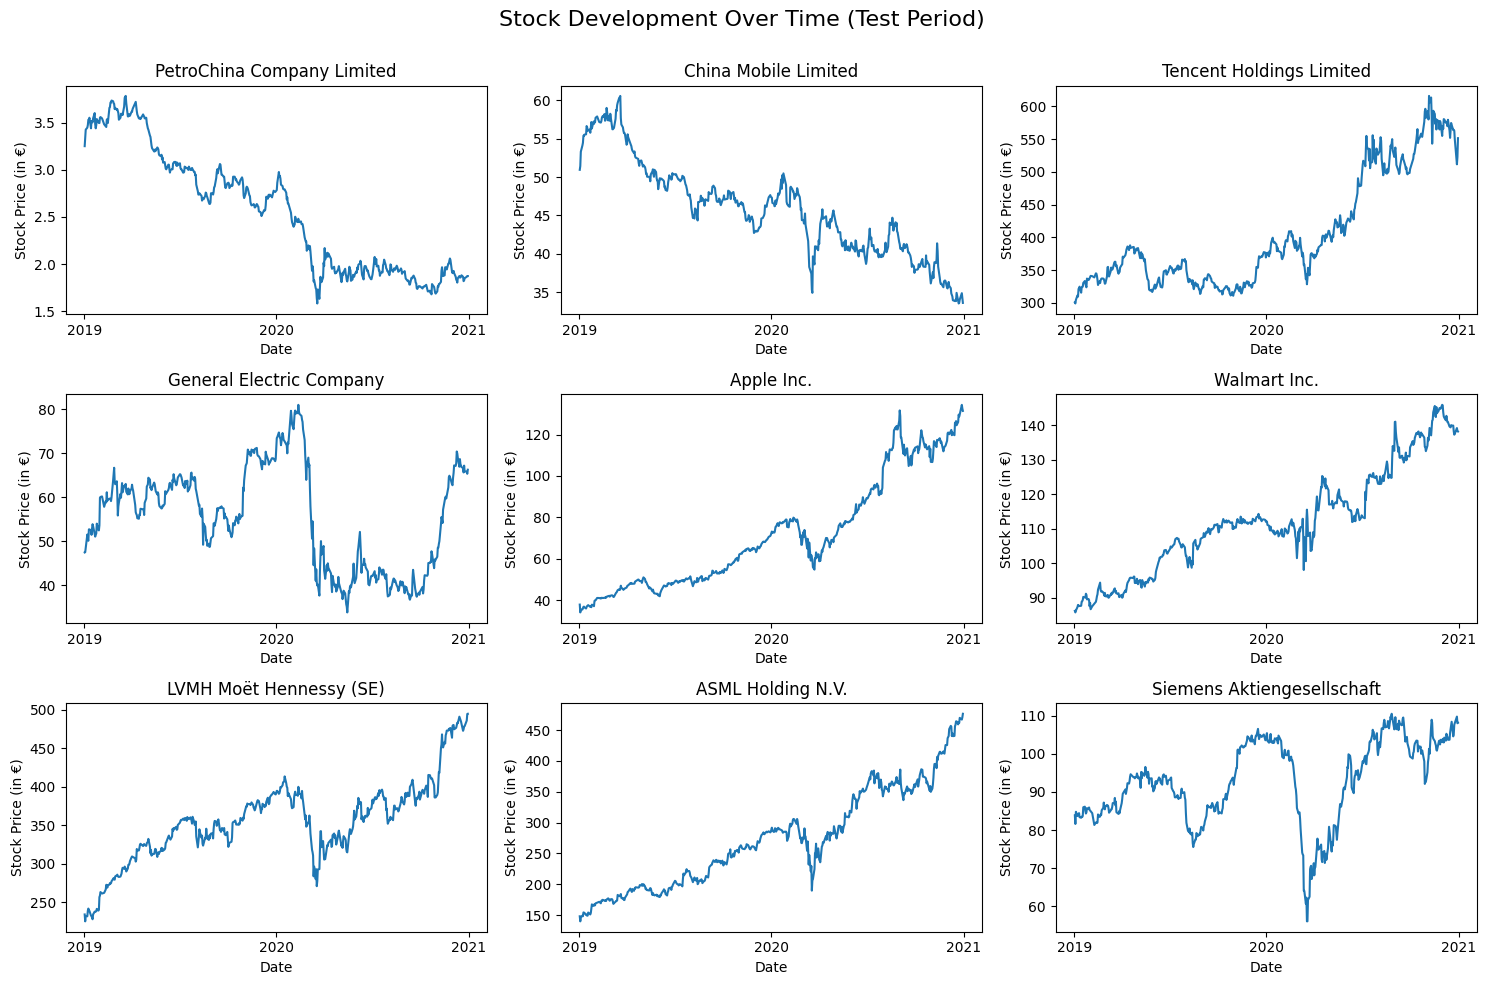

In [37]:
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# loop through stocks and plot each in a separate subplot
for i in range(3):
    for j in range(3):
        stock_name = stocks_test.columns[i*3+j]
        sns.lineplot(data=stocks_test[stock_name], ax=axes[i, j])
        
        # show only the years as the x-ticks
        axes[i, j].xaxis.set_major_locator(mdates.YearLocator())
        axes[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        
        x_scaler = int(stocks.iloc[:,[i*3+j]].max())*1.1
        axes[i,j].set_title(stock_name)
        axes[i,j].set_xlabel('Date')
        axes[i,j].set_ylabel('Stock Price (in €)')

# title for the entire set of subplots
fig.suptitle('Stock Development Over Time (Test Period) \n', fontsize=16)

# adjust subplot layout
plt.tight_layout()

# save plot
plt.savefig('Stocks_Development_Test.png')

# show the plot
plt.show()

In [38]:
# number of portfolios
num_portfolios = 9

In [39]:
# calculate the covariane matrix
cov_matrix_test = log_returns_test.cov()

In [40]:
# save all risk measures in these numpy arrays
weights_all_test = np.array([np.round(weights_all[index_low_sd],4), \
                            np.round(weights_all[index_middle_sd],4), \
                            np.round(weights_all[index_high_sd],4), \
                            np.round(weights_all[index_low_var],4), \
                            np.round(weights_all[index_middle_var],4), \
                            np.round(weights_all[index_high_var],4), \
                            np.round(weights_all[index_low_cvar],4), \
                            np.round(weights_all[index_middle_cvar],4), \
                            np.round(weights_all[index_high_cvar],4),])
realized_return_daily_test = np.zeros(num_portfolios)
sd_daily_test = np.zeros(num_portfolios)
var_daily_test = np.zeros(num_portfolios)
cvar_daily_test = np.zeros(num_portfolios)

In [41]:
for val in range(num_portfolios):
    '''
    validate for all portfolios times different and calculate the respective risk metrics
    '''

    # create a temporary df to apply weights on the daily log returns
    log_returns_weights = log_returns_test.copy()
    # apply weights on individual daily returns
    for i in range(log_returns_test.shape[1]):
        log_returns_weights.iloc[:,i] *= weights_all_test[val][i]
    # combine to only one numpy array
    log_returns_aggregated = log_returns_weights.sum(axis=1)

    # calculate all risk measures for all portfolios and add them to their respective numpy array
    # all measures here are in log-scale
    # daily risk measures

    # expected return daily
    realized_return_daily_test[val] = np.mean(log_returns_aggregated)
    # standard deviation daily
    sd_daily_test[val] = np.sqrt(np.dot(weights_all_test[val], np.dot(cov_matrix_test, weights_all_test[val])))
    # Value at Risk (VaR) daily
    var_daily_test[val] = -np.percentile(log_returns_aggregated, 1-confidence_level)
    # Conditional Value at Risk (CVaR) daily
    # find losses exceeding VaR
    losses = [r for r in log_returns_aggregated if r < -var_daily_test[val]]
    cvar_daily_test[val] = -np.mean(losses)

In [42]:
# print all properties of the test period

descriptions = ['\n Risk Properties of Low Point (Based on Standard Deviation): \n', \
               '\n Risk Properties of Middle Point (Based on Standard Deviation): \n', \
               '\n Risk Properties of High Point (Based on Standard Deviation): \n', \
               '\n Risk Properties of Low Point (Based on VaR): \n', \
               '\n Risk Properties of Middle Point (Based on VaR): \n', \
               '\n Risk Properties of High Point (Based on VaR): \n', \
               '\n Risk Properties of Low Point (Based on CVaR): \n', \
               '\n Risk Properties of Middle Point (Based on CVaR): \n', \
               '\n Risk Properties of High Point (Based on CVaR): \n']

for i in range(num_portfolios):
    print(descriptions[i], \
          'Weights: ', weights_all_test[i], \
          '\n Expected Return: ', realized_return_daily_test[i], \
          '\n Standard Deviation: ', sd_daily_test[i], \
          '\n VaR: ', var_daily_test[i], \
          '\n CVaR: ', cvar_daily_test[i])


 Risk Properties of Low Point (Based on Standard Deviation): 
 Weights:  [-0.0362  0.3343  0.0426 -0.0503  0.3041  0.5076  0.168   0.0382 -0.3082] 
 Expected Return:  0.0011834700578032878 
 Standard Deviation:  0.014266007796950409 
 VaR:  0.06924127769497067 
 CVaR:  0.07130311611249626

 Risk Properties of Middle Point (Based on Standard Deviation): 
 Weights:  [-6.183e-01  3.388e-01  7.013e-01 -4.487e-01  5.851e-01  1.689e-01
  3.369e-01 -6.340e-02 -5.000e-04] 
 Expected Return:  0.0032336640002900772 
 Standard Deviation:  0.024480312571492337 
 VaR:  0.08620101520729512 
 CVaR:  0.08986932353665927

 Risk Properties of High Point (Based on Standard Deviation): 
 Weights:  [-0.687  -0.8378  0.9632 -0.9346  0.8691 -0.5697  0.6091  0.908   0.6799] 
 Expected Return:  0.007771598328253547 
 Standard Deviation:  0.05016207620464885 
 VaR:  0.22058816386628585 
 CVaR:  0.2222111101812601

 Risk Properties of Low Point (Based on VaR): 
 Weights:  [ 0.4233  0.0928  0.0263 -0.1366  0.201

##### 9. Simulate with $1,000,000 Beginning Investment and Compare with Risk Free Rate

##### 9.1. Calculate End Values

In [43]:
# define how much money to invest
total_investment = 1000000
# storing the final investment values
final_investment = np.zeros(num_portfolios)

for i in range(num_portfolios):
    portfolio_value = 1000000
    for j in range(stocks_test.shape[1]):
        # calculate for each stock the amount of investment (weight * total_investment)
        # multiply with 1 + return = (Price end / Price beginning)
        # accounted for long- and short-position
        portfolio_value += weights_all_test[i,j]*total_investment*(stocks_test.iloc[-1,j]/stocks_test.iloc[0,j])
    # assign to numpy array
    final_investment[i] = portfolio_value

In [44]:
# print final values of all portfolios
descriptions = ['\n Value of portfolio at the end of test period (Low Point, Based on Standard Deviation): \n', \
               '\n Value of portfolio at the end of test period (Middle Point, Based on Standard Deviation): \n', \
               '\n Value of portfolio at the end of test period (High Point, Based on Standard Deviation): \n', \
               '\n Value of portfolio at the end of test period (Low Point, Based on VaR): \n', \
               '\n Value of portfolio at the end of test period (Middle Point, Based on VaR): \n', \
               '\n Value of portfolio at the end of test period (High Point, Based on VaR): \n', \
               '\n Value of portfolio at the end of test period (Low Point, Based on CVaR): \n', \
               '\n Value of portfolio at the end of test period (Middle Point, Based on CVaR): \n', \
               '\n Value of portfolio at the end of test period (High Point, Based on CVaR): \n']

for i in range(num_portfolios):
    print(descriptions[i], round(final_investment[i],2))


 Value of portfolio at the end of test period (Low Point, Based on Standard Deviation): 
 3155210.65

 Value of portfolio at the end of test period (Middle Point, Based on Standard Deviation): 
 4333879.03

 Value of portfolio at the end of test period (High Point, Based on Standard Deviation): 
 7694312.61

 Value of portfolio at the end of test period (Low Point, Based on VaR): 
 2667626.73

 Value of portfolio at the end of test period (Middle Point, Based on VaR): 
 4307411.61

 Value of portfolio at the end of test period (High Point, Based on VaR): 
 7694312.61

 Value of portfolio at the end of test period (Low Point, Based on CVaR): 
 2667626.73

 Value of portfolio at the end of test period (Middle Point, Based on CVaR): 
 4662888.5

 Value of portfolio at the end of test period (High Point, Based on CVaR): 
 7694312.61


##### 9.2. Chart with Portfolio Development Over Time

In [45]:
# create pandas dataframe for development of portfolios
investment_dev = pd.DataFrame()
# add date index from log return dataframe
investment_dev.index = log_returns_test.index

In [46]:
# calculate final value of investment
for val in range(num_portfolios):
    # create a temporary df to apply weights on the daily log returns
    log_returns_temp = log_returns_test.copy()
    # use cumulative sum and then use exponential function to get gross return = 1 + return
    gross_return = np.exp(log_returns_temp.cumsum())
    # apply weights on individual daily returns
    for i in range(log_returns_test.shape[1]):
        gross_return.iloc[:,i] *= weights_all_test[val][i]
    # combine to only one numpy array
    gross_return_aggregated = gross_return.sum(axis=1)
    # apply total_investment
    investment_dev[f'Portfolio_{val+1}'] = gross_return_aggregated * total_investment

In [47]:
# titles for plots
titles = ['Portfolio Low Point (Based on Standard Deviation) \n', \
               'Portfolio Middle Point (Based on Standard Deviation) \n', \
               'Portfolio High Point (Based on Standard Deviation) \n', \
               'Portfolio Low Point (Based on VaR) \n', \
               'Portfolio Middle Point (Based on VaR) \n', \
               'Portfolio High Point (Based on VaR) \n', \
               'Portfolio Low Point (Based on CVaR) \n', \
               'Portfolio Middle Point (Based on CVaR) \n', \
               'Portfolio High Point (Based on CVaR) \n']

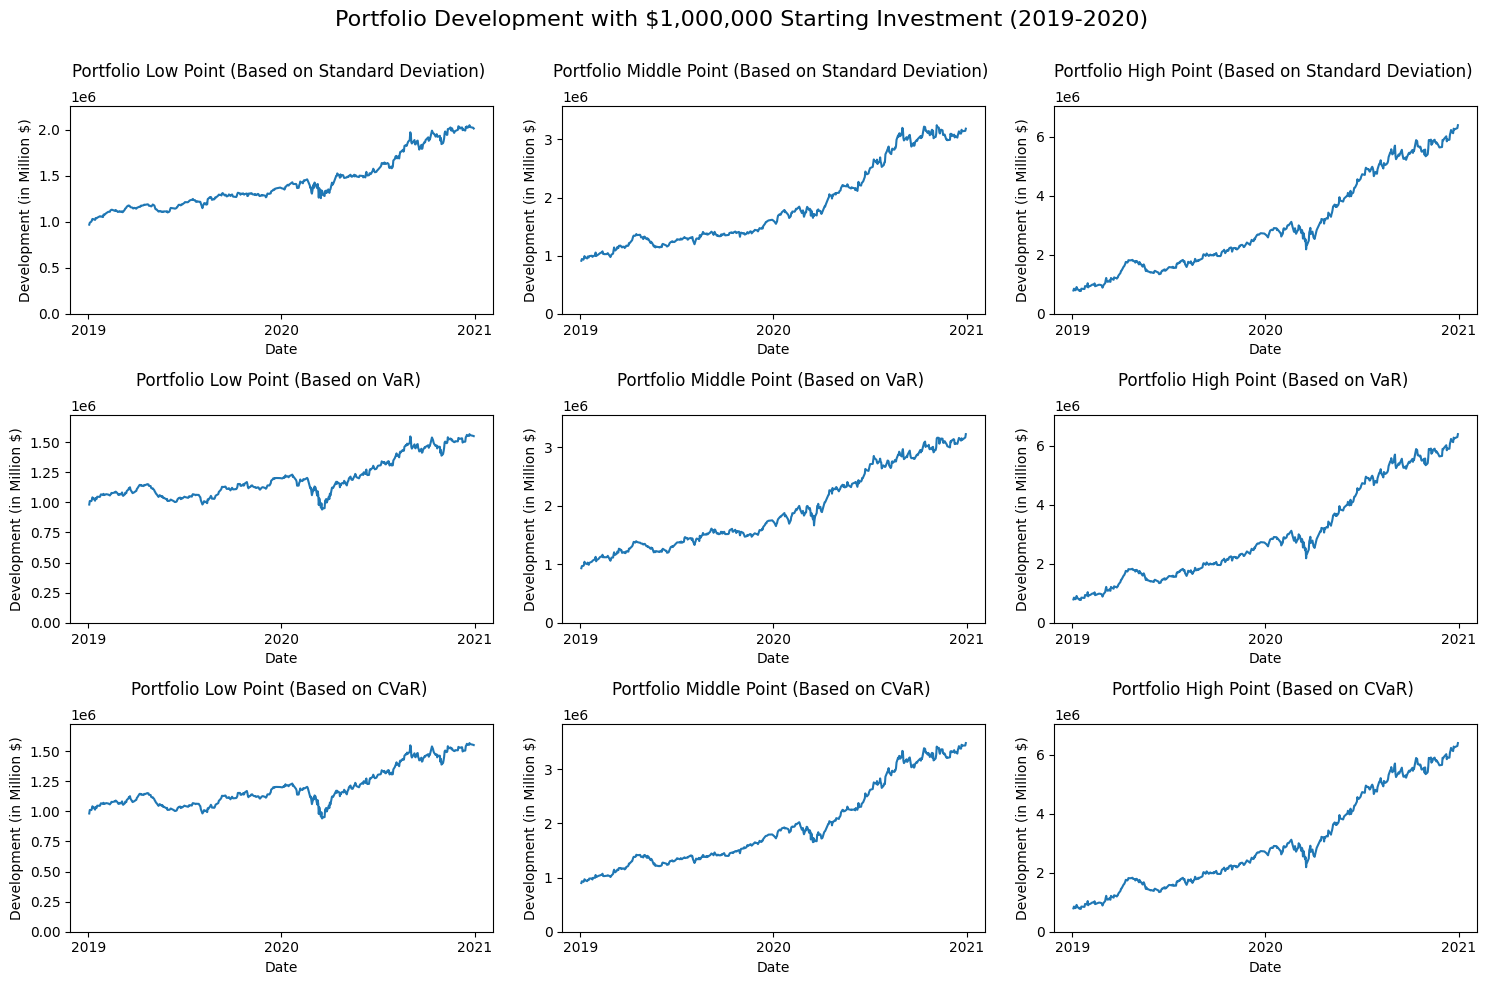

In [48]:
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# loop through portfolios and plot each in a separate subplot
for i in range(3):
    for j in range(3):
        portfolio_name = investment_dev.columns[i*3+j]
        sns.lineplot(data=investment_dev[portfolio_name], ax=axes[i, j])
        
        # show only the years as the x-ticks
        axes[i, j].xaxis.set_major_locator(mdates.YearLocator())
        axes[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        
        x_scaler = int(investment_dev.iloc[:,[i*3+j]].max())*1.1
        axes[i,j].set_title(titles[i*3+j])
        axes[i,j].set_xlabel('Date')
        axes[i,j].set_ylim([0,max(investment_dev[portfolio_name]*1.1)])
        axes[i,j].set_ylabel('Development (in Million $)')

# title for the entire set of subplots
fig.suptitle('Portfolio Development with $1,000,000 Starting Investment (2019-2020) \n', fontsize=16)

# adjust subplot layout
plt.tight_layout()

# save plot
plt.savefig('Portfolio_Development.png')

# show the plot
plt.show()

##### 9.3. Calculate Development of Portfolio Fully Invested in Risk Free Rate

In [49]:
# import dataframe containing yearly risk-free rates
risk_free = pd.read_csv('LIBOR_2019_2020.csv', usecols=['Close','Date'])

In [50]:
# convert to right formats
risk_free['Yearly'] = risk_free['Close'].str.rstrip('%').astype('float') / 100.0
risk_free.index = risk_free['Date'].astype('datetime64')
risk_free = risk_free.drop(columns=['Date','Close'])
risk_free = risk_free.sort_index()

In [51]:
# check dataframe
risk_free.head()

,Yearly
Date,
2019-01-02,0.027939
2019-01-03,0.027950
2019-01-04,0.028039
2019-01-06,0.028039
2019-01-07,0.027968


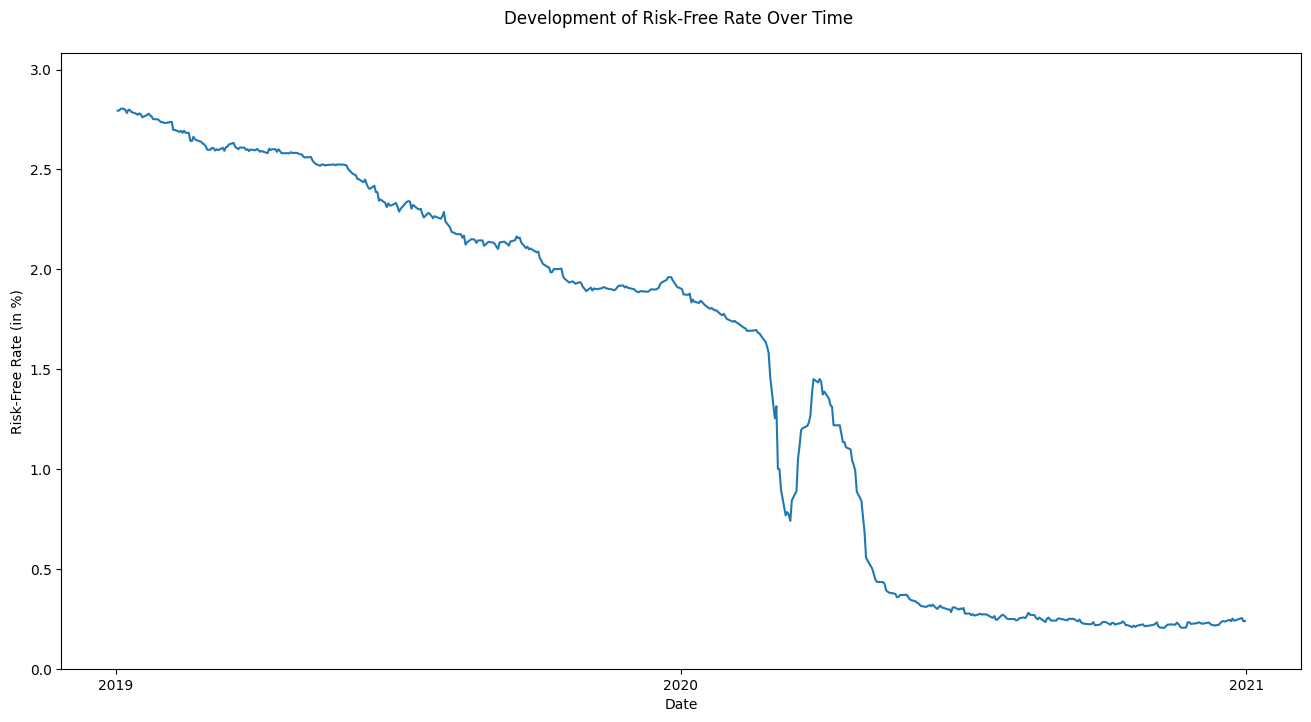

In [52]:
# plot risk-free rate

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.plot(risk_free.index,risk_free['Yearly']*100)

# set axes ranges
plt.ylim([0,max(risk_free['Yearly'])*100*1.1])
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# title for plot and axes
plt.title('Development of Risk-Free Rate Over Time \n')
plt.xlabel('Date')
plt.ylabel('Risk-Free Rate (in %)')

# save plot
plt.savefig('Risk_Free_Rate_2019_2020.png')

# plot
plt.show()

In [53]:
# calculate risk-free rates
risk_free['Daily_Gross_Return'] = (1 + risk_free['Yearly'])**(1/365) - 1
risk_free['Daily_Gross_Return'] = risk_free['Daily_Gross_Return'].cumsum() + 1 
risk_free['Investment'] = risk_free['Daily_Gross_Return'] * total_investment

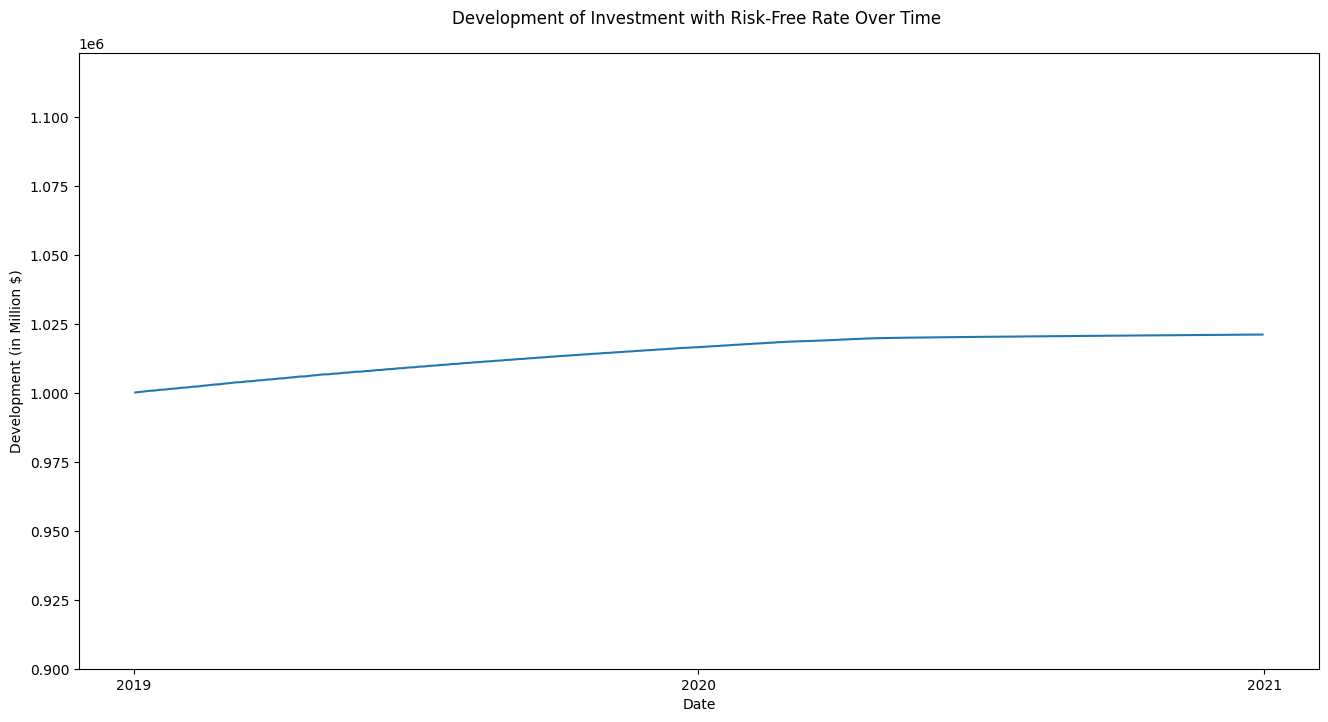

In [54]:
# plot investment with risk-free rate

# define figure
plt.figure(figsize=(16,8))

# plot the variables
plt.plot(risk_free.index,risk_free['Investment'])

# set axes ranges
plt.ylim([900000,max(risk_free['Investment'])*1.1])
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# title for plot and axes
plt.title('Development of Investment with Risk-Free Rate Over Time \n')
plt.xlabel('Date')
plt.ylabel('Development (in Million $)')

# save plot
plt.savefig('Portfolio_Development_Risk_Free.png')

# plot
plt.show()

In [55]:
# print end value 
print(risk_free['Investment'][-1])

1021070.3296479163
